In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import folium
import webbrowser
from datetime import datetime
from collections import Counter
from IPython.display import display

In [2]:
# Assuming you have data in a CSV named "sightings.csv"
df = pd.read_csv("nuforc_reports.csv")

In [3]:
df.head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,Viewed some red lights in the sky appearing to...,Visalia,CA,2021-12-15T21:45:00,light,2 minutes,Occurred : 12/15/2021 21:45 (Entered as : 12/...,http://www.nuforc.org/webreports/165/S165881.html,Viewed some red lights in the sky appearing to...,2021-12-19T00:00:00,36.356650,-119.347937
1,Look like 1 or 3 crafts from North traveling s...,Cincinnati,OH,2021-12-16T09:45:00,triangle,14 seconds,Occurred : 12/16/2021 09:45 (Entered as : 12/...,http://www.nuforc.org/webreports/165/S165888.html,Look like 1 or 3 crafts from North traveling s...,2021-12-19T00:00:00,39.174503,-84.481363
2,seen dark rectangle moving slowly thru the sky...,Tecopa,CA,2021-12-10T00:00:00,rectangle,Several minutes,Occurred : 12/10/2021 00:00 (Entered as : 12/...,http://www.nuforc.org/webreports/165/S165810.html,seen dark rectangle moving slowly thru the sky...,2021-12-19T00:00:00,NaN,NaN
3,"One red light moving switly west to east, beco...",Knoxville,TN,2021-12-10T19:30:00,triangle,20-30 seconds,Occurred : 12/10/2021 19:30 (Entered as : 12/...,http://www.nuforc.org/webreports/165/S165825.html,"One red light moving switly west to east, beco...",2021-12-19T00:00:00,35.961561,-83.980115
4,"Bright, circular Fresnel-lens shaped light sev...",Alexandria,VA,2021-12-07T08:00:00,circle,NaN,Occurred : 12/7/2021 08:00 (Entered as : 12/0...,http://www.nuforc.org/webreports/165/S165754.html,"Bright, circular Fresnel-lens shaped light sev...",2021-12-19T00:00:00,38.798958,-77.095133


In [4]:
# Convert date-time column to datetime format for plotting
df["date_time"] = pd.to_datetime(df["date_time"])

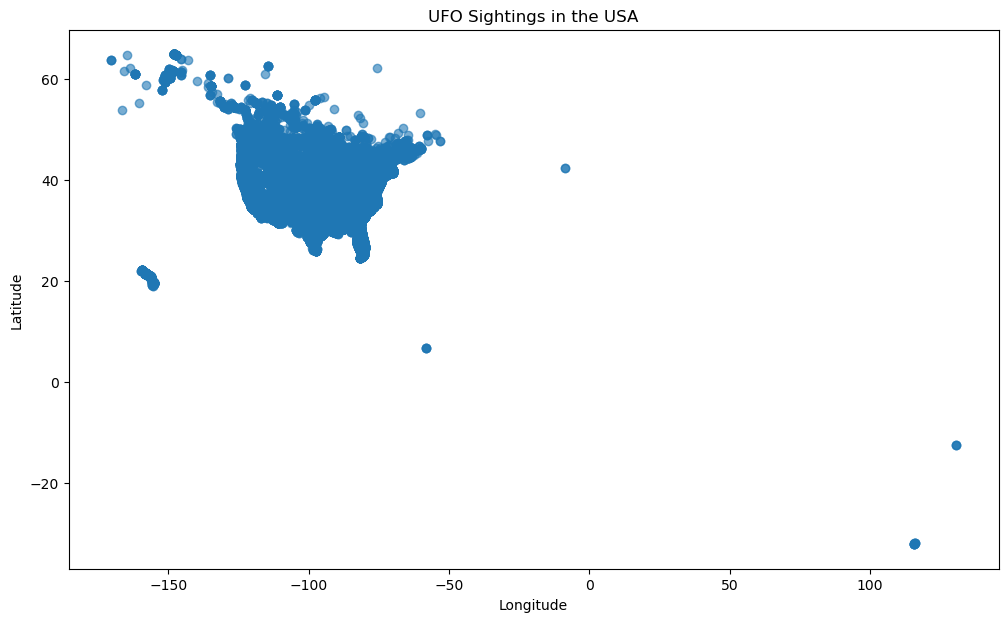

In [5]:
# 1. Map Visualization
plt.figure(figsize=(12, 7))
plt.scatter(df["city_longitude"], df["city_latitude"], alpha=0.6)
plt.title("UFO Sightings in the USA")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [6]:
#Map Visualization using real map

sample_data = df.sample(n=2000)  # Taking a sample of 1000 sightings

m = folium.Map(location=[37.0902, -95.7129], zoom_start=4) #USA geographic location

for idx, row in sample_data.iterrows():
    if not pd.isnull(row["city_latitude"]) and not pd.isnull(row["city_longitude"]):
        folium.CircleMarker(
            location=[row["city_latitude"], row["city_longitude"]],
            radius=3,
            color="blue",
            fill=True,
            fill_color="blue",
            fill_opacity=0.6
        ).add_to(m)

m.save("ufo_sightings_map_sample.html")


In [7]:
webbrowser.open('ufo_sightings_map_sample.html', new=2)

True

In [8]:
display(m)

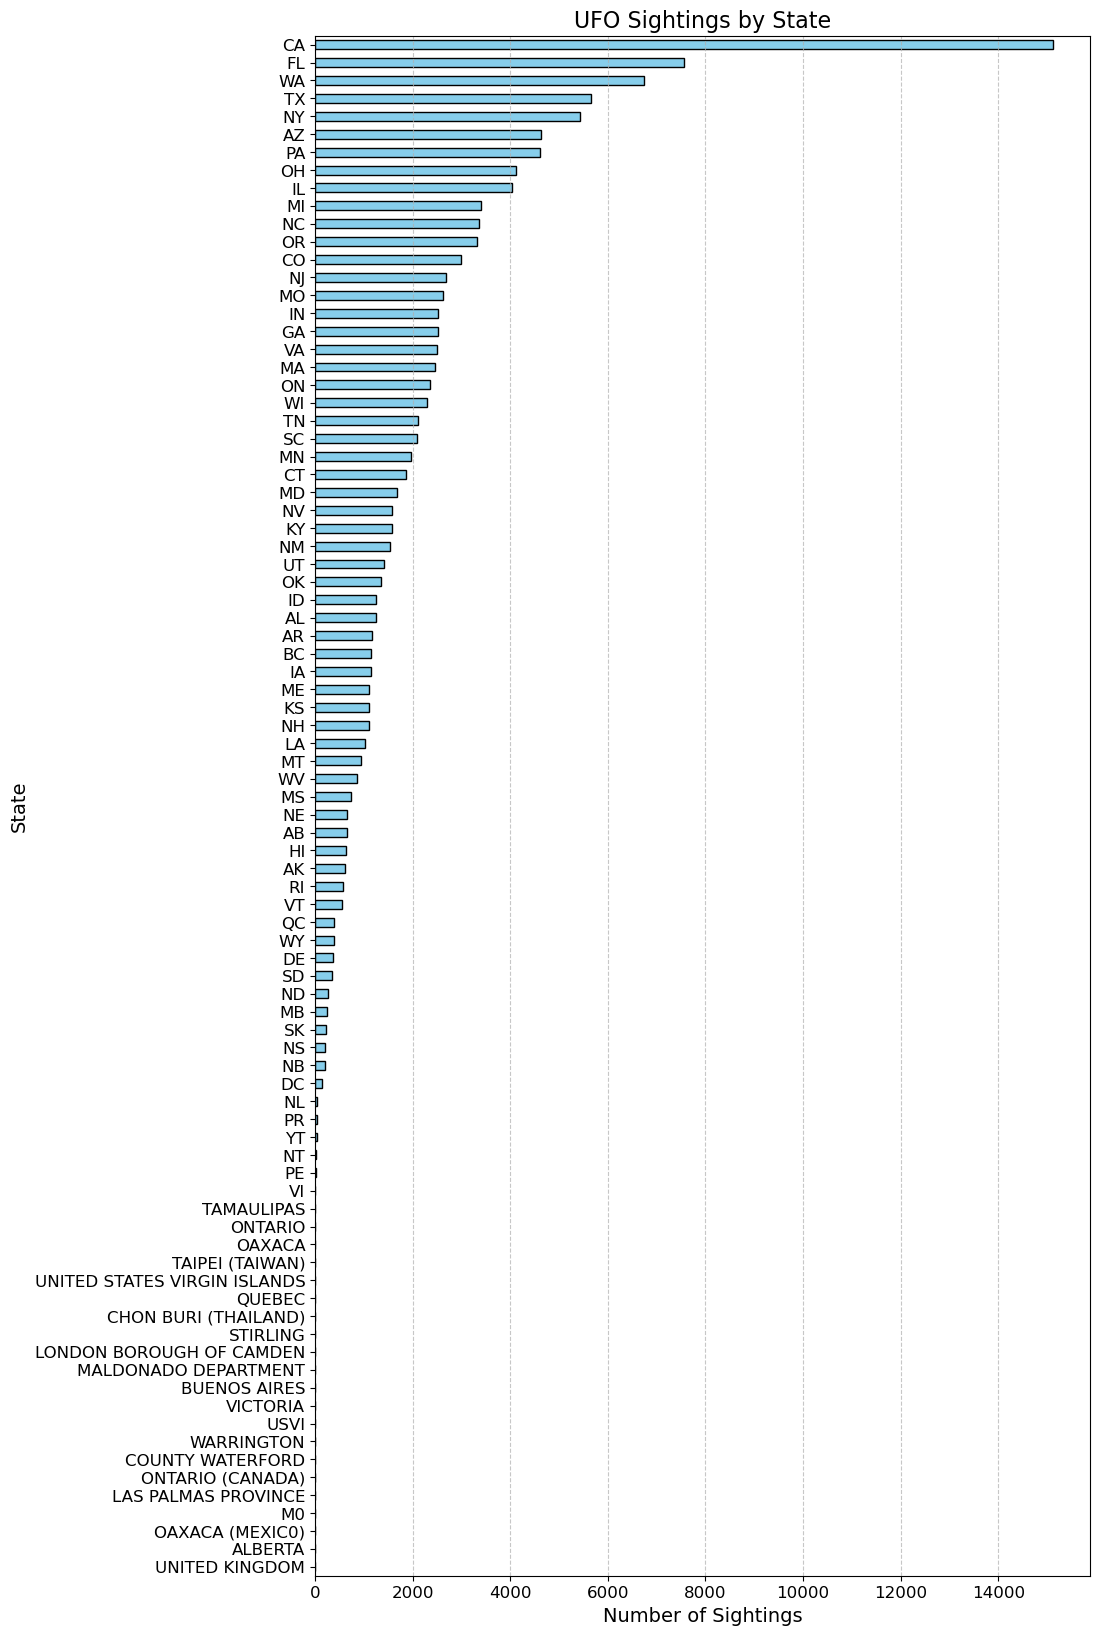

In [9]:
# Sightings by state
state_counts = df["state"].value_counts()

plt.figure(figsize=(10, 20))  # Adjust size for clarity
state_counts.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")  # Sort for better visualization
plt.title("UFO Sightings by State", fontsize=16)
plt.ylabel("State", fontsize=14)
plt.xlabel("Number of Sightings", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

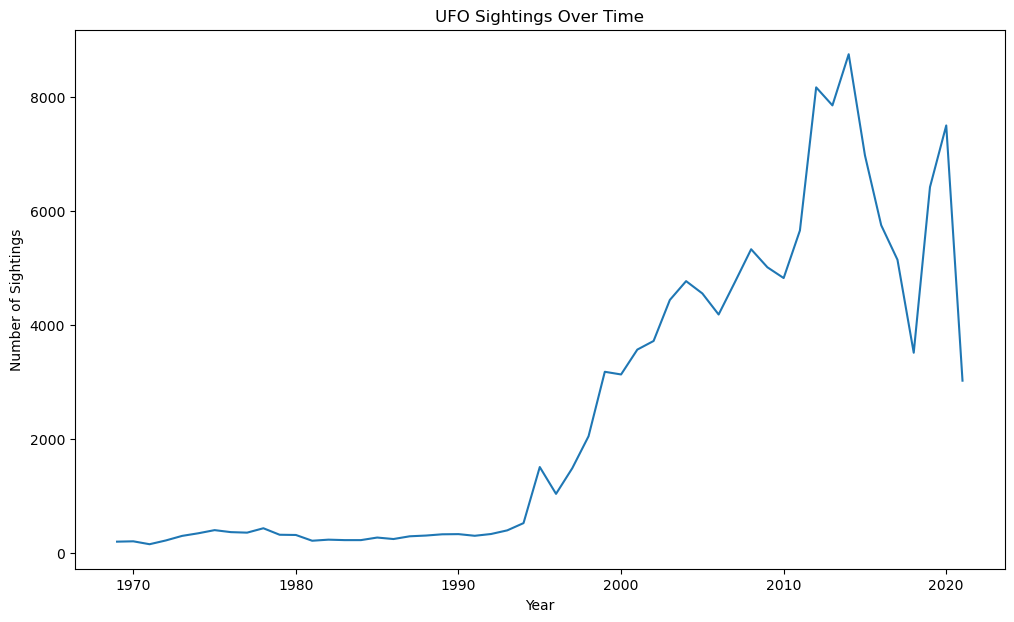

In [10]:
# 3. Timeline of Sightings
df["year"] = df["date_time"].dt.year
year_counts = df["year"].value_counts().sort_index()
plt.figure(figsize=(12, 7))
year_counts.plot()
plt.title("UFO Sightings Over Time")
plt.ylabel("Number of Sightings")
plt.xlabel("Year")
plt.show()

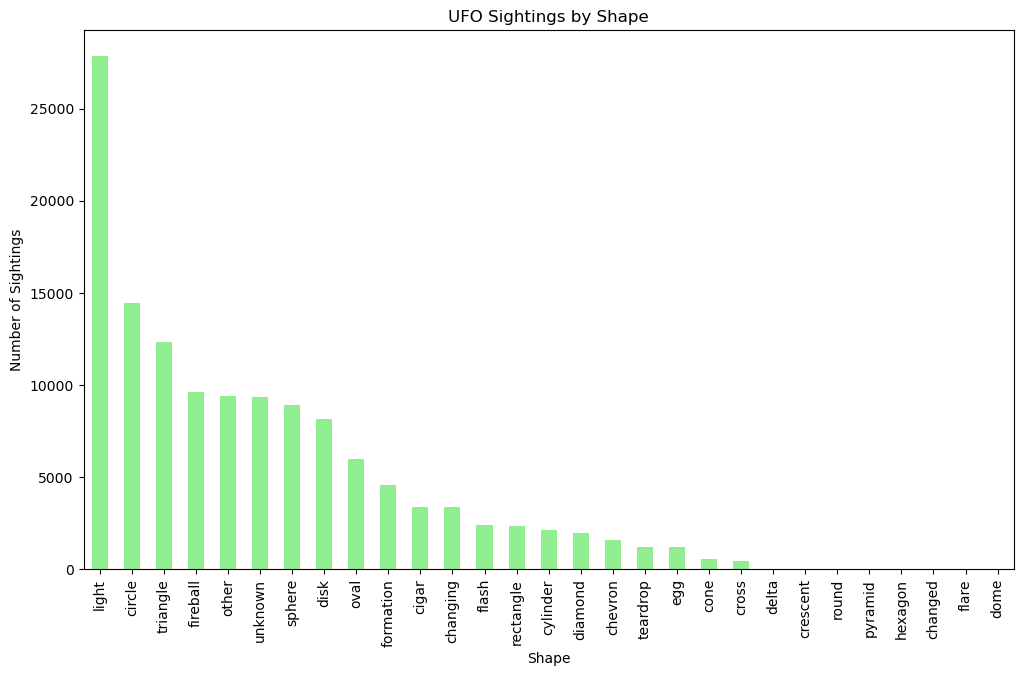

In [11]:
# 4. Sightings by Shape
shape_counts = df["shape"].value_counts()
plt.figure(figsize=(12, 7))
shape_counts.plot(kind="bar", color="lightgreen")
plt.title("UFO Sightings by Shape")
plt.ylabel("Number of Sightings")
plt.xlabel("Shape")
plt.show()

In [12]:
'''Most Frequent words Based on Summury and Text'''

'Most Frequent words Based on Summury and Text'

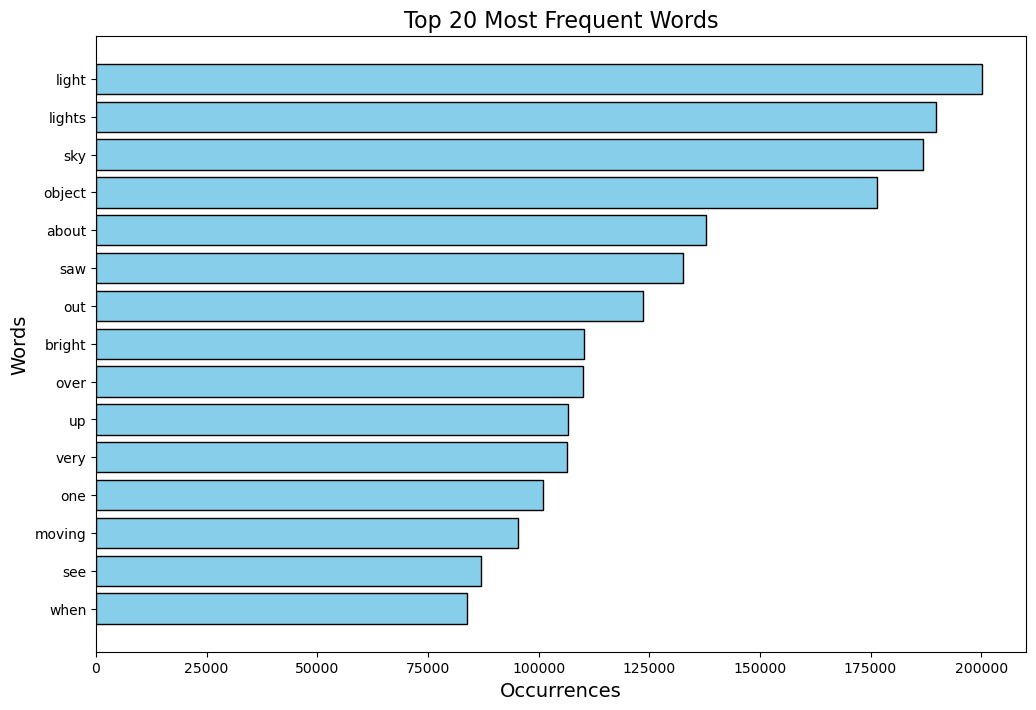

In [13]:
# Combine the 'summary' and 'text' columns
combined_text = df["summary"].astype(str) + " " + df["text"].astype(str)

# Tokenize the combined text
words = []
for text in combined_text:
    words.extend(re.findall(r'\w+', text.lower()))

# Count the occurrences
word_counts = Counter(words)

# Remove common stopwords (you can add more stopwords to this list)
stopwords = set(["i","we","the", "and", "to", "of", "a", "in", "that", "is", "was", "or","had", "have","for", "an","what","on", "with","were","there","be","they","not","no", "like","then","but","as", "it", "by", "at", "from", "this", "I", "my"])
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

# Take the top 20 most common words for visualization
top_words = dict(Counter(filtered_word_counts).most_common(15))

# Plot
plt.figure(figsize=(12, 8))
plt.barh(list(top_words.keys()), list(top_words.values()), color='skyblue', edgecolor='black')
plt.xlabel('Occurrences', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('Top 20 Most Frequent Words', fontsize=16)
plt.gca().invert_yaxis()  # To display the most common word at the top
plt.show()

In [14]:
df.corr()

,city_latitude,city_longitude,year
city_latitude,1.000000,-0.117559,-0.018410
city_longitude,-0.117559,1.000000,0.031673
year,-0.018410,0.031673,1.000000


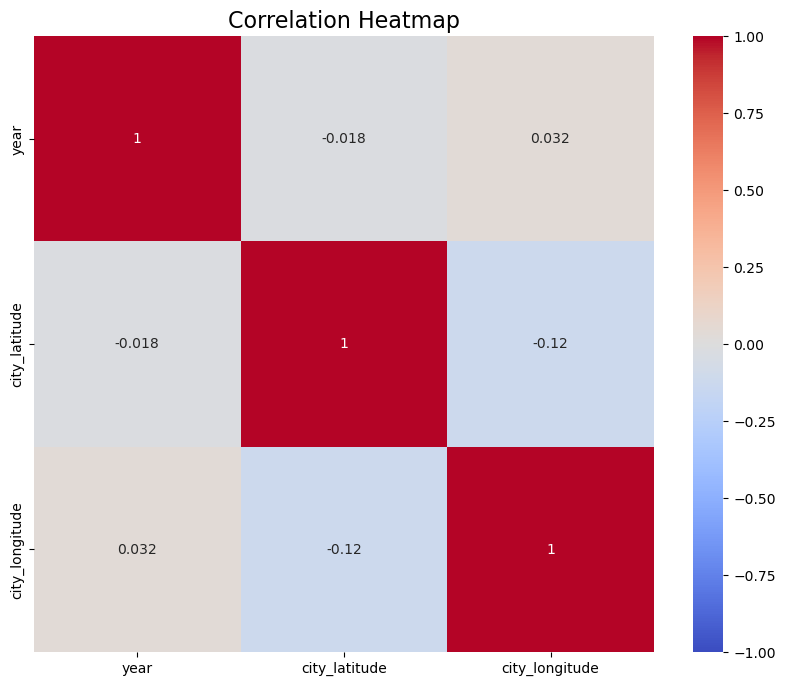

In [15]:
# heatmap
correlation_matrix = df[["year", "city_latitude", "city_longitude"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()